In [80]:
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
df = pd.read_csv('single.csv')
df_gpu = pd.read_csv('gpu.csv')
df1 = pd.read_csv('node1.csv')
df2 = pd.read_csv('node2.csv')

In [97]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df_gpu['timestamp'] = pd.to_datetime(df_gpu['timestamp'])

df['timestamp'] -= df['timestamp'].min()
df1['timestamp'] -= df1['timestamp'].min()
df2['timestamp'] -= df2['timestamp'].min()
df_gpu['timestamp'] -= df_gpu['timestamp'].min()

In [98]:
display(df.head())
display(df_gpu.head())
display(df2.head())
display(df1.head())

,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.078125,2.302401
1,1,1,NaN,NaN,00:00:01.397725,0.093750,2.301556
2,2,2,NaN,NaN,00:00:02.838407,0.171875,2.305653
3,3,3,NaN,NaN,00:00:04.177668,0.109375,2.298388
4,4,4,NaN,NaN,00:00:05.551351,0.031250,2.309383


,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.109375,2.303010
1,1,1,NaN,NaN,00:00:00.012023,0.078125,2.303426
2,2,2,NaN,NaN,00:00:00.023767,0.140625,2.301588
3,3,3,NaN,NaN,00:00:00.035481,0.078125,2.300195
4,4,4,NaN,NaN,00:00:00.047312,0.140625,2.303497


,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.109375,2.299885
1,1,1,NaN,NaN,00:00:00.910891,0.062500,2.310079
2,2,2,NaN,NaN,00:00:01.824175,0.046875,2.304602
3,3,3,NaN,NaN,00:00:02.751140,0.078125,2.305081
4,4,4,NaN,NaN,00:00:03.595470,0.140625,2.312088


,index,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,00:00:00,0.203125,2.300724
1,1,1,NaN,NaN,00:00:00.929936,0.109375,2.305564
2,2,2,NaN,NaN,00:00:01.813931,0.093750,2.302901
3,3,3,NaN,NaN,00:00:02.726515,0.109375,2.308669
4,4,4,NaN,NaN,00:00:03.537642,0.078125,2.303820


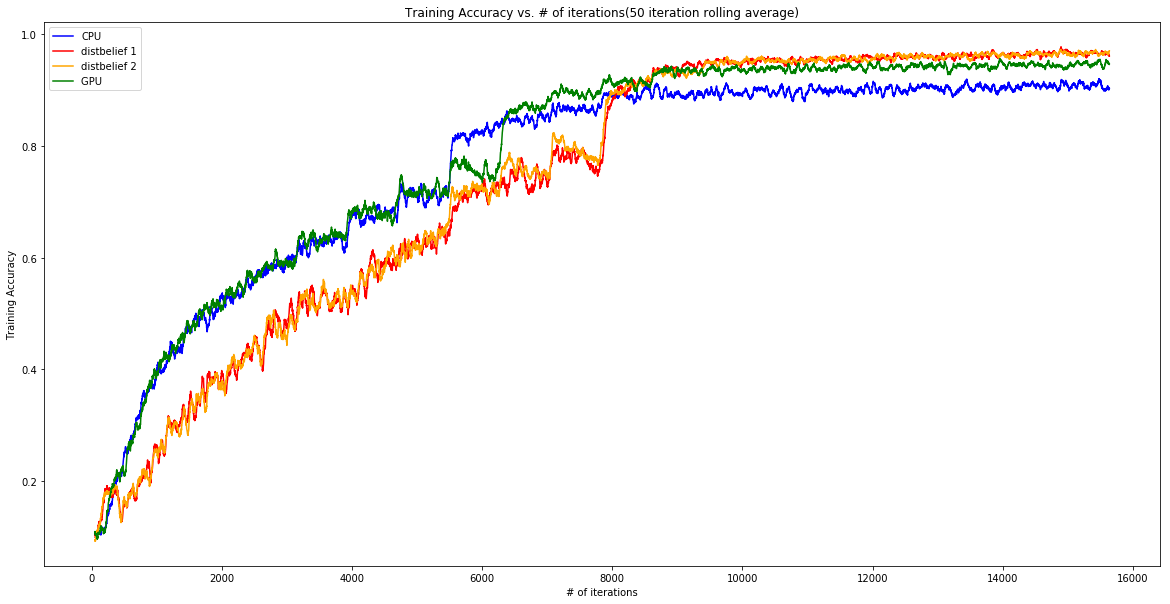

In [102]:
fig = plt.figure(figsize=(20, 10))

#df = df.dropna()
#df1 = df1.dropna()
#df2 = df2.dropna()
#df_gpu = df_gpu.dropna()

plt.plot(df['index'],df['training_accuracy'].rolling(50).mean(), label='CPU', color='b', )
plt.plot(df1['index'],df1['training_accuracy'].rolling(50).mean(), label='distbelief 1', color='r')
plt.plot(df2['index'],df2['training_accuracy'].rolling(50).mean(), label='distbelief 2', color='orange')
plt.plot(df_gpu['index'],df_gpu['training_accuracy'].rolling(50).mean(), label='GPU ', color='green')

plt.ylabel('Training Accuracy')
plt.xlabel('# of iterations')
plt.legend()
plt.title("Training Accuracy vs. # of iterations(50 iteration rolling average)")
plt.savefig('fig1.png')
plt.show()